<h1><center>Credit Scoring</center></h1>

In [132]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


## EDA

In [3]:
# Load the dataset
data = pd.read_excel('Base_Final_Final.xlsx', sheet_name='Original')

In [4]:
# Take the first rows to explore the data
data.head()

,REGIONAL,ESTADO CIVIL,# CARGAS,NIVEL DE ESTUDIOS,TIPO DE VIVIENDA,EDAD,SEXO,INGRESOS,EGRESOS,AÑO_CREACION,OCUPACION,TIPO DE GARANTÍA,TIPO DEST.,VALOR ORI.PRESTAM,TASA,CALIFICAC,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
0,1,Casado,2.0,Secundaria,Vive Con Familia,34.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,1.66,156.88,24
1,1,Casado,2.0,Secundaria,Vive Con Familia,34.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,0.00,156.88,24
2,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Artesano,Pagaré,CT,3000.0,22.17,A1,1.55,156.88,24
3,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Ama De Casa,Pagaré,CT,3000.0,22.17,A1,1.48,156.88,24
4,1,Casado,2.0,Secundaria,Vive Con Familia,35.0,Femenino,700.0,530.17,3,Ama De Casa,Pagaré,CT,3000.0,22.17,A1,1.41,156.88,24


In [5]:
# Describe 
data.describe()

,REGIONAL,# CARGAS,EDAD,INGRESOS,EGRESOS,AÑO_CREACION,VALOR ORI.PRESTAM,TASA,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
count,126863.000000,126700.000000,126710.000000,126863.000000,126863.000000,126863.000000,126863.000000,126863.000000,126848.000000,126863.000000,126863.000000
mean,1.497836,1.221618,42.194507,2905.702100,2044.677671,3.229547,8694.760327,21.366844,20.380611,297.650742,39.381798
std,0.653797,1.000052,13.263097,2315.537261,1980.157729,1.392030,6928.536145,1.001125,79.946904,182.267259,13.022025
min,1.000000,0.000000,20.000000,0.000000,0.000000,1.000000,500.000000,18.500000,0.000000,0.000000,5.000000
25%,1.000000,1.000000,31.000000,1305.000000,593.000000,2.000000,4000.000000,20.600000,2.610000,173.380000,26.000000
50%,1.000000,1.000000,41.000000,2181.140000,1358.000000,3.000000,6000.000000,22.170000,5.420000,249.660000,37.000000
75%,2.000000,2.000000,51.000000,3800.000000,2847.500000,4.000000,10000.000000,22.170000,14.120000,374.140000,48.000000
max,3.000000,6.000000,89.000000,60000.000000,41449.200000,5.000000,40000.000000,24.320000,4754.960000,1750.630000,78.000000


In [47]:
data.isnull().sum() 

REGIONAL                0
ESTADO CIVIL          153
# CARGAS              163
NIVEL DE  ESTUDIOS    163
TIPO DE VIVIENDA        0
EDAD                  153
SEXO                  153
INGRESOS                0
EGRESOS                 0
AÑO_CREACION            0
OCUPACION               0
TIPO DE GARANTÍA        0
TIPO DEST.              0
VALOR ORI.PRESTAM       0
TASA                    0
CALIFICAC               0
OTROS RUBROS DEUDA     15
VALOR CUOTA             0
CUOT_TOT                0
dtype: int64

In [50]:
null_vals_variables = ['ESTADO CIVIL', '# CARGAS', 'NIVEL DE  ESTUDIOS', 'EDAD', 'SEXO', 'OTROS RUBROS DEUDA']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126710 non-null  object 
 2   # CARGAS            126700 non-null  float64
 3   NIVEL DE  ESTUDIOS  126700 non-null  object 
 4   TIPO DE VIVIENDA    126863 non-null  object 
 5   EDAD                126710 non-null  float64
 6   SEXO                126710 non-null  object 
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  object 
 11  TIPO DE GARANTÍA    126863 non-null  object 
 12  TIPO DEST.          126863 non-null  object 
 13  VALOR ORI.PRESTAM   126863 non-null  float64
 14  TASA                126863 non-null  float64
 15  CALIFICAC           126863 non-nul

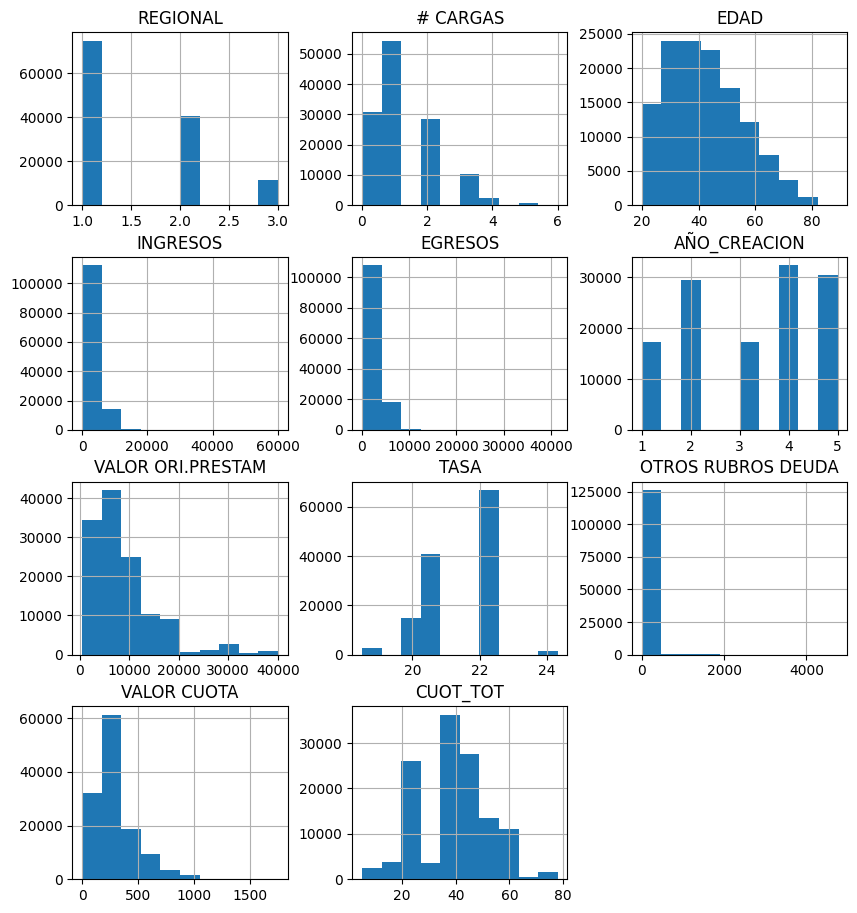

In [8]:
data.hist(grid=True, figsize=(10,11));

In [9]:
print(max(data['INGRESOS']))
print(min(data['INGRESOS']))
print(data['INGRESOS'].mean())

60000.0
0.0
2905.702100488716


In [10]:
variables = data.columns
numeric_variables = data._get_numeric_data().columns
categorical_variables = list(set(variables) - set(numeric_variables))
printmd(f'**Variables in dataset:** {len(variables)}')
printmd(f'**Original quantitative variables:** {len(numeric_variables)}')
print(numeric_variables.to_list())
printmd(f'**Original qualitative variables:** {len(categorical_variables)}')
print(categorical_variables)


**Variables in dataset:** 19

**Original quantitative variables:** 11

['REGIONAL', '# CARGAS', 'EDAD', 'INGRESOS', 'EGRESOS', 'AÑO_CREACION', 'VALOR ORI.PRESTAM', 'TASA', 'OTROS RUBROS DEUDA', 'VALOR CUOTA', 'CUOT_TOT']


**Original qualitative variables:** 8

['TIPO DE VIVIENDA', 'NIVEL DE  ESTUDIOS', 'SEXO', 'CALIFICAC', 'TIPO DEST.', 'TIPO DE GARANTÍA', 'OCUPACION', 'ESTADO CIVIL']


#### Qualitative Variables Encoding

It is time to work with qualitative variables, we can use One Encoder or a Label Encoder, in this case study the
qualitative variables are going to be processed as ordinal variables, because most of them represent an order or hierarchy, so will use Label Encoder with previously defined labels.

In [11]:
#Label encoding for qualitative variables
encoder = ce.OrdinalEncoder(cols=['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION',
                                  'TIPO DE GARANTÍA', 'CALIFICAC', 'NIVEL DE  ESTUDIOS'],
                    return_df=True,
                       mapping=[{
                           'col': 'SEXO',
                           'mapping': {
                               'None': 0,
                               'Femenino': 0,
                               'Masculino': 1
                               }
                           },
                           {
                            'col': 'TIPO DEST.',
                            'mapping':{
                                'None': 0,
                                'AS': 0,
                                'OT': 0,
                                'IF': 1,
                                'II': 1,
                                'CT': 2,
                                'RP': 2,
                                'TE': 3,
                                'TF': 3,
                                'TL': 3,
                                'TO': 3,
                                'TP': 3,
                                'TT': 3
                            }
                           },
                           {
                            'col': 'ESTADO CIVIL',
                            'mapping': {
                                'None': 0,
                                'NA': 0,
                                'Soltero': 0,
                                'Union Libre': 0,
                                'Casado': 1,
                                'Divorciado': 1,
                                'Viudo': 1
                                }
                           },
                           {
                            'col': 'TIPO DE VIVIENDA',
                            'mapping': {
                                'None': 0,
                                'Propia': 0,
                                'Arrendada': 1,
                                'Prestada': 1,
                                'Vive Con Familia': 1
                                }
                           },
                           {
                            'col': 'OCUPACION',
                            'mapping': {
                                'None': 0,
                                'Jubilado': 0,
                                'Acuicultor': 1,
                                'Albañil': 1,
                                'Ama De Casa': 1,
                                'Arrendador': 1,
                                'Artesano': 1,
                                'Barbero': 1,
                                'Carpintero': 1,
                                'Cerrajero ': 1,
                                'Chef / Cocinero Y Afines': 1,
                                'Comerciante': 1,
                                'Conductor / Animador': 1,
                                'Conductor Profesional': 1,
                                'Consultor Profesional': 1,
                                'Consultorias Profesionales': 1,
                                'Contratista': 1,
                                'Cosmetóloga': 1,
                                'Doctor / A': 1,
                                'Electricista': 1,
                                'Estudiante': 1,
                                'Fabricación De Otros Productos De Metal Ncp': 1,
                                'Fabricación de Productos Lácteos': 1,
                                'Faenador / Carnicero': 1,
                                'Ganadero': 1,
                                'Hojalatero': 1,
                                'Horticultor': 1,
                                'Horticultor De Árbol': 1,
                                'Independiente': 1,
                                'Instructor / Capacitador': 1,
                                'Jefe de Área': 1,
                                'Masajista': 1,
                                'Mecánico': 1,
                                'Músico': 1,
                                'Nutricionista': 1,
                                'Panadero / Pastelero': 1,
                                'Peluquero': 1,
                                'Pescador Y Recolector De Productos Del Mar': 1,
                                'Plomero': 1,
                                'Productor De Huevos': 1,
                                'Sastre / Costurera': 1,
                                'Soldador': 1,
                                'Técnico de Audio': 1,
                                'Terapista Y Afines': 1,
                                'Tornero': 1,
                                'Veterinario': 1,
                                'Zapatero': 1,
                                'Analista / Afines': 2,
                                'Asesor Inmobiliario': 2,
                                'Asistentes / Auxiliares /Ayudantes Y Afines': 2,
                                'Atencion Al Cliente': 2,
                                'Bombero': 2,
                                'Cajero': 2,
                                'Conserje / Portero': 2,
                                'Contador': 2,
                                'Despachador / Perchero': 2,
                                'Digitador': 2,
                                'Diseñador Gráfico': 2,
                                'Docente': 2,
                                'Ejecutivo / Afines': 2,
                                'Embasadores / Conservas Y Afines': 2,
                                'Empacador / Cargador': 2,
                                'Empleada Doméstica': 2,
                                'Empleado Privado': 2,
                                'Empleado Público': 2,
                                'Enfermero (A)': 2,
                                'Farmaceuticos  Y Hospitalarios': 2,
                                'Floristería': 2,
                                'Fotografo': 2,
                                'Gerente General': 2,
                                'Guardia de Seguridad': 2,
                                'Jardinero': 2,
                                'Mensajero / Repartidor': 2,
                                'Militar': 2,
                                'Motorista': 2,
                                'Obreros': 2,
                                'Operador De Maquinas De Cultivo / Agricolas': 2,
                                'Otras Actividades De Servicios': 2,
                                'Paramédico': 2,
                                'Periodista': 2,
                                'Policia Nacional': 2,
                                'Publicista': 2,
                                'Quimico Farmaceutico': 2,
                                'Recepcionista / Anfitriona': 2,
                                'Salonero / Barman / Posillero / Similares': 2,
                                'Secretaria / Oficinista': 2,
                                'Subgerencias Y Afines': 2,
                                'Supervisor': 2,
                                'Técnico': 2,
                                'Vendedor / A': 2
                                }
                           },
                           {
                            'col': 'TIPO DE GARANTÍA',
                            'mapping': {
                                'None': 0,
                                'Hipoteca': 0,
                                'Pagaré': 1
                                }
                           },
                           {
                            'col': 'CALIFICAC',
                            'mapping': {
                                'None': 0,
                                'A1': 0,
                                'A2': 0,
                                'A3': 0,
                                'B1': 1,
                                'B2': 1,
                                'C1': 1,
                                'C2': 1,
                                'D': 1,
                                'E': 1,
                                }
                           },
                           {
                            'col': 'NIVEL DE  ESTUDIOS',
                            'mapping': {
                                'None': 0,
                                'NA': 0,
                                'Primaria': 0,
                                'Sin Estudios': 0,
                                'Secundaria': 1,
                                'Técnico': 1,
                                'Postgrado': 2,
                                'Universitaria': 2
                                }
                           },
                       ])

In [12]:
# Encode qualitative variables with defined labels
print(data[['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION', 'TIPO DE GARANTÍA']])
encoded_qualitative_variables = encoder.fit_transform(data[['SEXO', 'TIPO DEST.', 
                                                            'ESTADO CIVIL', 'TIPO DE VIVIENDA',
                                                            'OCUPACION', 'TIPO DE GARANTÍA', 'CALIFICAC', 
                                                            'NIVEL DE  ESTUDIOS']])
print(encoded_qualitative_variables)

             SEXO TIPO DEST. ESTADO CIVIL  TIPO DE VIVIENDA  \
0        Femenino         CT       Casado  Vive Con Familia   
1        Femenino         CT       Casado  Vive Con Familia   
2        Femenino         CT       Casado  Vive Con Familia   
3        Femenino         CT       Casado  Vive Con Familia   
4        Femenino         CT       Casado  Vive Con Familia   
...           ...        ...          ...               ...   
126858  Masculino         TE       Casado            Propia   
126859  Masculino         TE       Casado            Propia   
126860  Masculino         TE       Casado            Propia   
126861  Masculino         TE       Casado            Propia   
126862  Masculino         TE       Casado            Propia   

                    OCUPACION TIPO DE GARANTÍA  
0                    Artesano           Pagaré  
1                    Artesano           Pagaré  
2                    Artesano           Pagaré  
3                 Ama De Casa           Pagaré 

In [13]:
test_range_min = 100
test_range_max = 115
print(data[['SEXO', 'TIPO DEST.', 'ESTADO CIVIL', 'TIPO DE VIVIENDA', 'OCUPACION']][test_range_min:test_range_max])
print(encoded_qualitative_variables[:][test_range_min:test_range_max])

         SEXO TIPO DEST. ESTADO CIVIL TIPO DE VIVIENDA  \
100  Femenino         TE        Viudo           Propia   
101  Femenino         TE        Viudo           Propia   
102  Femenino         TE        Viudo           Propia   
103  Femenino         TE        Viudo           Propia   
104  Femenino         TE        Viudo           Propia   
105  Femenino         TE        Viudo           Propia   
106  Femenino         TE        Viudo           Propia   
107  Femenino         TO      Soltero           Propia   
108  Femenino         TO      Soltero           Propia   
109  Femenino         TO      Soltero           Propia   
110  Femenino         TO      Soltero           Propia   
111  Femenino         TO      Soltero           Propia   
112  Femenino         TO      Soltero           Propia   
113  Femenino         TO      Soltero           Propia   
114  Femenino         TO      Soltero           Propia   

                                       OCUPACION  
100                 

## Data cleaning

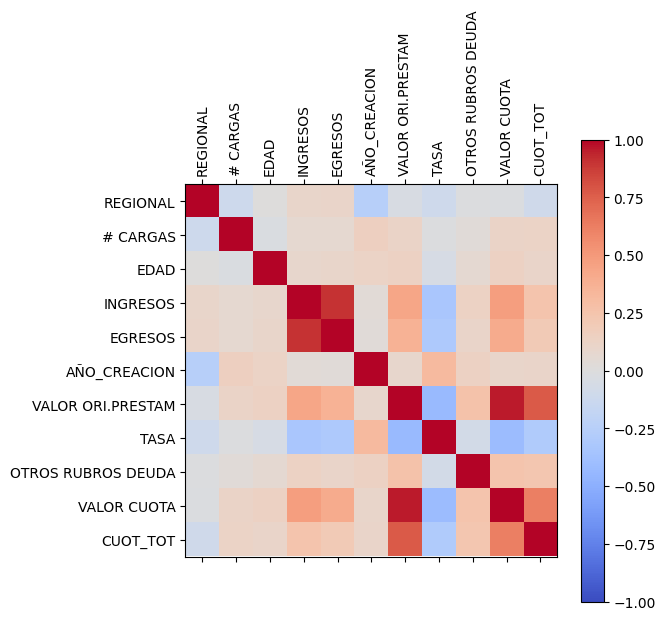

In [14]:
subdata = data[numeric_variables]
corr = subdata.corr(numeric_only=True)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

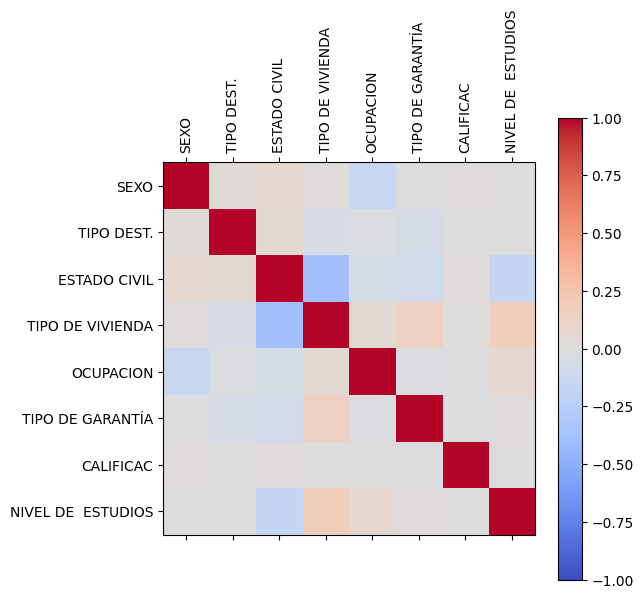

In [15]:
subdata = encoded_qualitative_variables
corr = subdata.corr(numeric_only=True)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

#### Grouping numeric values by range



In [16]:
# Age encoding
edad = data['EDAD'].copy()

edad[ edad<=35 ] = 0
edad[ (edad>35) & (edad<55) ] = 1
edad[ edad>=55 ] = 2

print(edad)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    1.0
126859    1.0
126860    1.0
126861    1.0
126862    1.0
Name: EDAD, Length: 126863, dtype: float64


In [17]:
# Regional encoding
regional = data['REGIONAL'].copy()
regional[ regional == 1 ] = 0
regional[ regional == 2 ] = 1
regional[ regional == 3 ] = 2
regional

0         0
1         0
2         0
3         0
4         0
         ..
126858    1
126859    1
126860    1
126861    1
126862    1
Name: REGIONAL, Length: 126863, dtype: int64

In [18]:
# CARGAS encoding
cargas = data['# CARGAS'].copy()
cargas[ cargas == 'NA' ] = 0
cargas[ cargas == 0 ] = 0
cargas[ cargas == 1 ] = 1
cargas[ cargas == 2 ] = 1
cargas[ cargas == 3 ] = 1
cargas[ cargas == 4 ] = 1
cargas[ cargas == 5 ] = 1
cargas[ cargas == 6 ] = 1
print(cargas[37:45])

37    0.0
38    0.0
39    0.0
40    1.0
41    1.0
42    1.0
43    1.0
44    1.0
Name: # CARGAS, dtype: float64


In [19]:
# Ingresos encoding
ingresos = data['INGRESOS'].copy()
ingresos[ ingresos < 15000 ] = 0
ingresos[ (ingresos >= 15000) & (ingresos < 30000) ] = 1
ingresos[ (ingresos >= 30000) & (ingresos < 45000) ] = 2
ingresos[ (ingresos >= 45000) & (ingresos <= 60000) ] = 3
ingresos

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    0.0
126859    0.0
126860    0.0
126861    0.0
126862    0.0
Name: INGRESOS, Length: 126863, dtype: float64

In [20]:
# Egresos encoding
egresos = data['EGRESOS'].copy()
egresos[ egresos < 10500 ] = 0
egresos[ (egresos >= 10500) & (egresos < 21000) ] = 1
egresos[ (egresos >= 21000) & (egresos < 31500) ] = 2
egresos[ (egresos >= 31500) & (egresos <= 42000) ] = 3
egresos

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
126858    0.0
126859    0.0
126860    0.0
126861    0.0
126862    0.0
Name: EGRESOS, Length: 126863, dtype: float64

<AxesSubplot: >

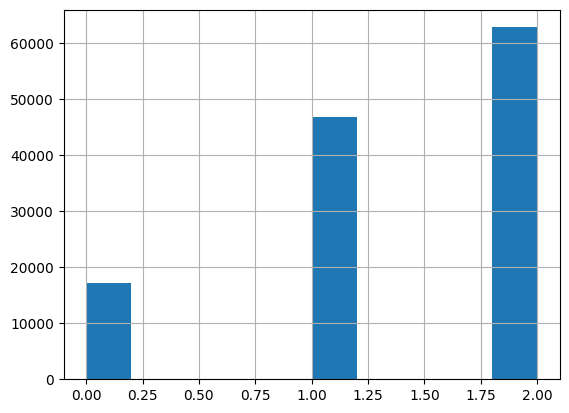

In [21]:
# Año creación encoding
creacion = data['AÑO_CREACION'].copy()
creacion[ creacion == 1 ] = 0
creacion[ (creacion >= 2) & (creacion <= 3)] = 1
creacion[ (creacion >= 4) & (creacion <= 5)] = 2
creacion.hist()

<AxesSubplot: >

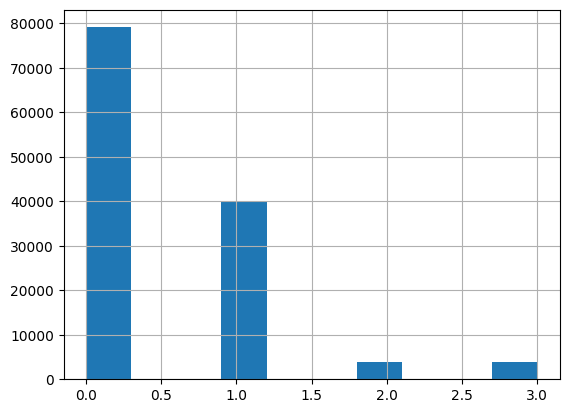

In [22]:
# Valor orig. Prestamo encoding
valor_ori_prestamo = data['VALOR ORI.PRESTAM'].copy()
valor_ori_prestamo[ valor_ori_prestamo < 10000 ] = 0
valor_ori_prestamo[ (valor_ori_prestamo >= 10000) & (valor_ori_prestamo < 20000) ] = 1
valor_ori_prestamo[ (valor_ori_prestamo >= 20000) & (valor_ori_prestamo < 30000) ] = 2
valor_ori_prestamo[ (valor_ori_prestamo >= 30000) & (valor_ori_prestamo <= 40000) ] = 3
valor_ori_prestamo.hist()

<AxesSubplot: >

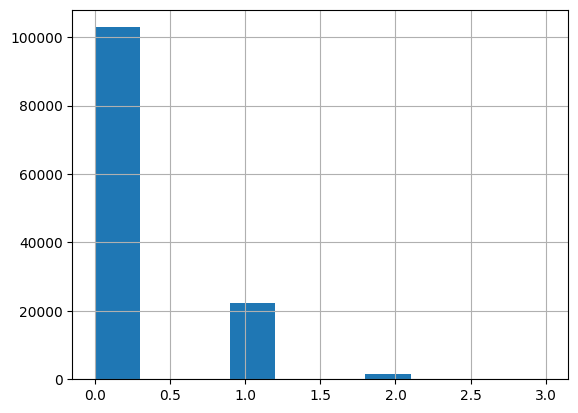

In [23]:
# Valor cuota encoding
valor_cuota = data['VALOR CUOTA'].copy()
valor_cuota[ valor_cuota < 450 ] = 0
valor_cuota[ (valor_cuota >= 450) & (valor_cuota < 900) ] = 1
valor_cuota[ (valor_cuota >= 900) & (valor_cuota < 1350) ] = 2
valor_cuota[ (valor_cuota >= 1350) & (valor_cuota <= 1800) ] = 3
valor_cuota.hist()

<AxesSubplot: >

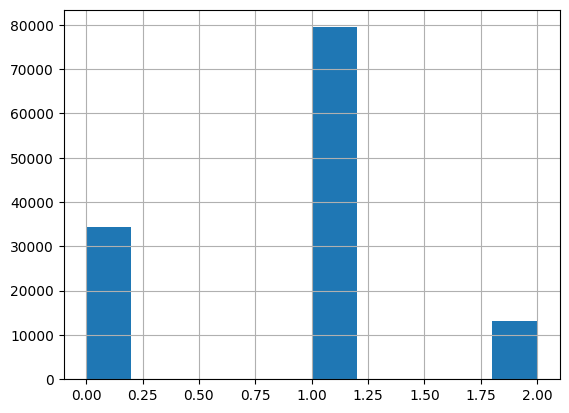

In [24]:
# CUOT_TOT encoding

cuota_total = data['CUOT_TOT'].copy()
cuota_total[ cuota_total < 30 ] = 0
cuota_total[ (cuota_total >= 30) & (cuota_total < 60) ] = 1
cuota_total[ (cuota_total >= 60) & (cuota_total <= 90) ] = 2
cuota_total.hist()

<AxesSubplot: >

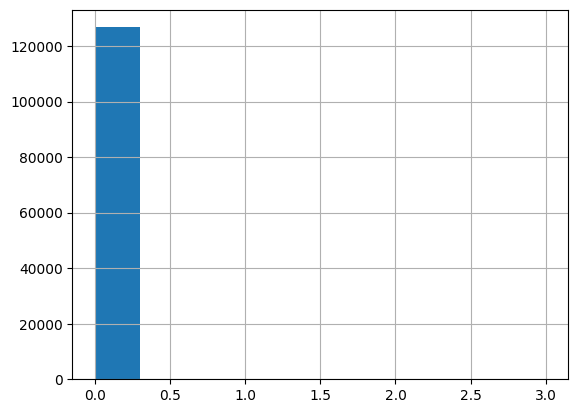

In [25]:
# OTROS RUBROS DEUDA encoding
otros_rubros = data['OTROS RUBROS DEUDA'].copy()
otros_rubros[ otros_rubros < 1250 ] = 0
otros_rubros[ (otros_rubros >= 1250) & (otros_rubros < 2500) ] = 1
otros_rubros[ (otros_rubros >= 2500) & (otros_rubros < 3750) ] = 2
otros_rubros[ (otros_rubros >= 3750) & (otros_rubros <= 5000) ] = 3
otros_rubros.hist()

<AxesSubplot: >

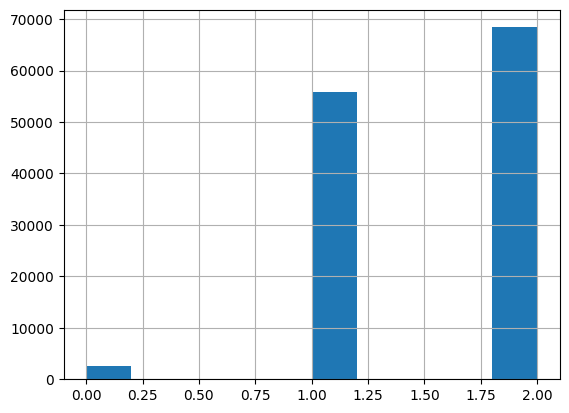

In [26]:
# TASA encoding
tasa = data['TASA'].copy()
tasa[ tasa == 18.50 ] = 0
tasa[ tasa == 19.00 ] = 0
tasa[ tasa == 20.06 ] = 1
tasa[ tasa == 20.60 ] = 1
tasa[ tasa == 21.00 ] = 1
tasa[ tasa == 22.17 ] = 2
tasa[ tasa == 24.32 ] = 2
tasa.hist()

In [27]:
# Replace encoded variables to create the encoded dataset,


# Replace qualitative variables
encoded_dataset = data.copy()
encoded_dataset['SEXO'] = encoded_qualitative_variables['SEXO'] #
encoded_dataset['TIPO DEST.'] = encoded_qualitative_variables['TIPO DEST.'] #
encoded_dataset['ESTADO CIVIL'] = encoded_qualitative_variables['ESTADO CIVIL'] #
encoded_dataset['TIPO DE VIVIENDA'] = encoded_qualitative_variables['TIPO DE VIVIENDA'] #
encoded_dataset['OCUPACION'] = encoded_qualitative_variables['OCUPACION'] #
encoded_dataset['TIPO DE GARANTÍA'] = encoded_qualitative_variables['TIPO DE GARANTÍA'] #
encoded_dataset['CALIFICAC'] = encoded_qualitative_variables['CALIFICAC'] #
encoded_dataset['NIVEL DE  ESTUDIOS'] = encoded_qualitative_variables['NIVEL DE  ESTUDIOS'] #

# Replace gruped numeric values
encoded_dataset['EDAD'] = edad #
encoded_dataset['REGIONAL'] = regional #
encoded_dataset['# CARGAS'] = cargas #
encoded_dataset['INGRESOS'] = ingresos #
encoded_dataset['EGRESOS'] = egresos #
encoded_dataset['AÑO_CREACION'] = creacion #
encoded_dataset['VALOR ORI.PRESTAM'] = valor_ori_prestamo #
encoded_dataset['VALOR CUOTA'] = valor_cuota#
encoded_dataset['CUOT_TOT'] = cuota_total #
encoded_dataset['OTROS RUBROS DEUDA'] = otros_rubros #
encoded_dataset['TASA'] = tasa

encoded_dataset

,REGIONAL,ESTADO CIVIL,# CARGAS,NIVEL DE ESTUDIOS,TIPO DE VIVIENDA,EDAD,SEXO,INGRESOS,EGRESOS,AÑO_CREACION,OCUPACION,TIPO DE GARANTÍA,TIPO DEST.,VALOR ORI.PRESTAM,TASA,CALIFICAC,OTROS RUBROS DEUDA,VALOR CUOTA,CUOT_TOT
0,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
1,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
2,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
3,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
4,0,1.0,1.0,1.0,1,0.0,0.0,0.0,0.0,1,1.0,1,2,0.0,2.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126858,1,1.0,1.0,1.0,0,1.0,1.0,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126859,1,1.0,1.0,1.0,0,1.0,1.0,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126860,1,1.0,1.0,1.0,0,1.0,1.0,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1
126861,1,1.0,1.0,1.0,0,1.0,1.0,0.0,0.0,1,1.0,1,3,1.0,1.0,0,0.0,0.0,1


In [28]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  float64
 2   # CARGAS            126700 non-null  float64
 3   NIVEL DE  ESTUDIOS  126863 non-null  float64
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126710 non-null  float64
 6   SEXO                126863 non-null  float64
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DE GARANTÍA    126863 non-null  int64  
 12  TIPO DEST.          126863 non-null  int64  
 13  VALOR ORI.PRESTAM   126863 non-null  float64
 14  TASA                126863 non-null  float64
 15  CALIFICAC           126863 non-nul

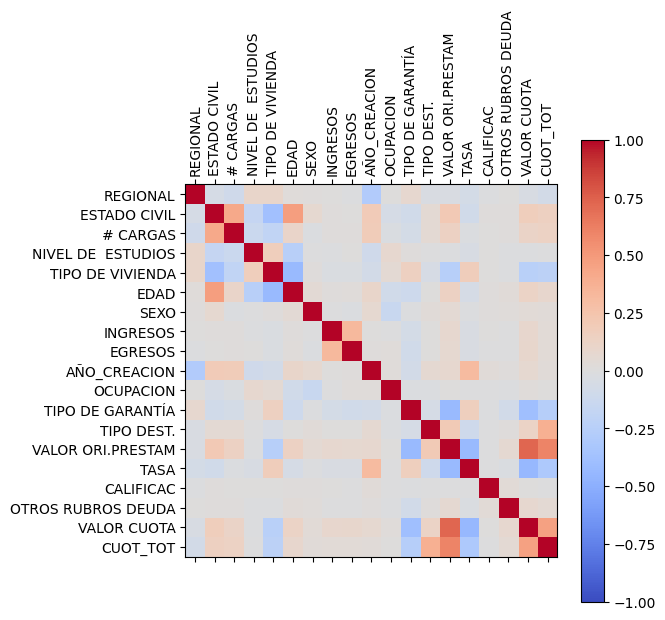

In [29]:
# See correlation of variables after encoding and procesing
subdata = encoded_dataset
corr = subdata.corr()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(subdata.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(subdata.columns)
ax.set_yticklabels(subdata.columns)
plt.show()

In [62]:
# Drop highly correlated variable
encoded_dataset.drop('VALOR CUOTA', axis=1, inplace=True)

KeyError: "['VALOR CUOTA'] not found in axis"

In [66]:
# Replace the missing values with mean
null_vals_variables = ['# CARGAS', 'EDAD', 'OTROS RUBROS DEUDA']
for var in null_vals_variables:
    encoded_dataset[var].fillna(encoded_dataset[var].mean(), inplace=True)
encoded_dataset.isna().sum()

REGIONAL              0
ESTADO CIVIL          0
# CARGAS              0
NIVEL DE  ESTUDIOS    0
TIPO DE VIVIENDA      0
EDAD                  0
SEXO                  0
INGRESOS              0
EGRESOS               0
AÑO_CREACION          0
OCUPACION             0
TIPO DE GARANTÍA      0
TIPO DEST.            0
VALOR ORI.PRESTAM     0
TASA                  0
CALIFICAC             0
OTROS RUBROS DEUDA    0
CUOT_TOT              0
dtype: int64

Al finalizar todo el proceso podemos ver como tenemos un dataset con todas las variables correctamente categorizadas, todas en formato numérico y sin valores faltantes, con esto tenemos nuestro dataset listo para poder continuar con el entrenamiento

In [69]:
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  float64
 2   # CARGAS            126863 non-null  float64
 3   NIVEL DE  ESTUDIOS  126863 non-null  float64
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  float64
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DE GARANTÍA    126863 non-null  int64  
 12  TIPO DEST.          126863 non-null  int64  
 13  VALOR ORI.PRESTAM   126863 non-null  float64
 14  TASA                126863 non-null  float64
 15  CALIFICAC           126863 non-nul

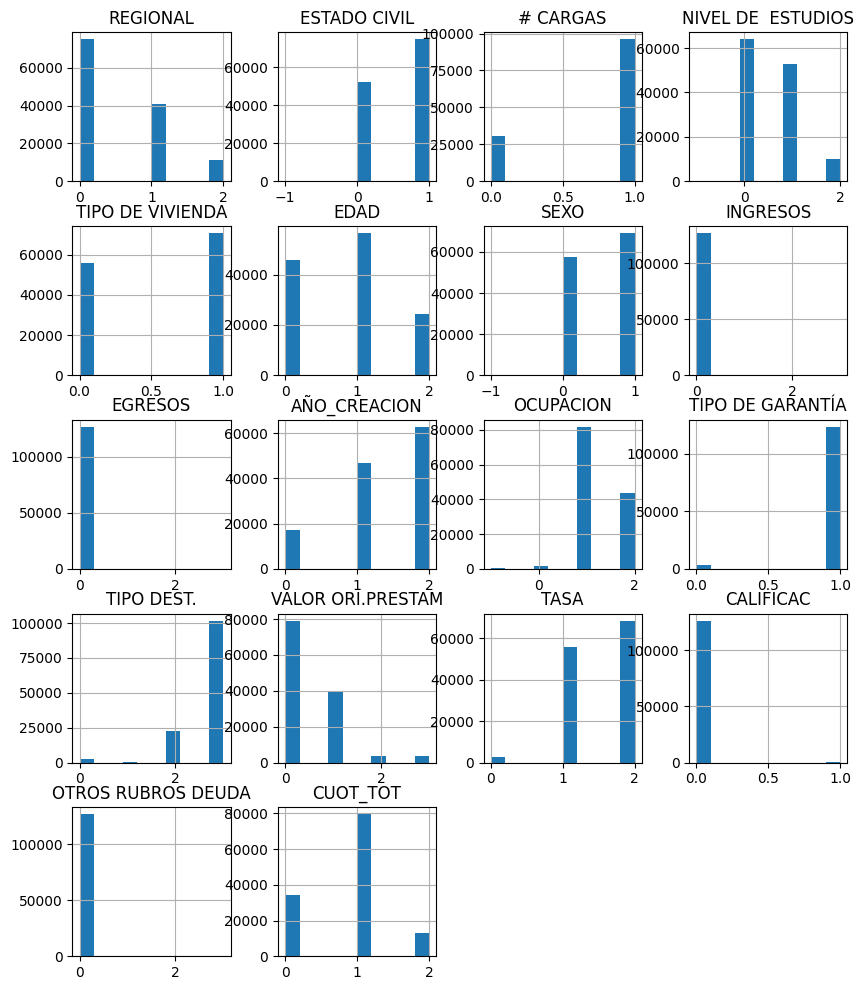

In [72]:
encoded_dataset.hist(grid=True, figsize=(10,12));

In [77]:
# Para poder separar en data de entrenamiento y testeo es necesario que acomodemos la variable objetivo 'CALIFICAC'
temp_calific = encoded_dataset.pop('CALIFICAC')
encoded_dataset.insert(loc=17, column = 'CALIFICAC', value=temp_calific)
encoded_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126863 entries, 0 to 126862
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            126863 non-null  int64  
 1   ESTADO CIVIL        126863 non-null  float64
 2   # CARGAS            126863 non-null  float64
 3   NIVEL DE  ESTUDIOS  126863 non-null  float64
 4   TIPO DE VIVIENDA    126863 non-null  int64  
 5   EDAD                126863 non-null  float64
 6   SEXO                126863 non-null  float64
 7   INGRESOS            126863 non-null  float64
 8   EGRESOS             126863 non-null  float64
 9   AÑO_CREACION        126863 non-null  int64  
 10  OCUPACION           126863 non-null  float64
 11  TIPO DE GARANTÍA    126863 non-null  int64  
 12  TIPO DEST.          126863 non-null  int64  
 13  VALOR ORI.PRESTAM   126863 non-null  float64
 14  TASA                126863 non-null  float64
 15  OTROS RUBROS DEUDA  126863 non-nul

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253274 entries, 0 to 253273
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   REGIONAL            253274 non-null  int64  
 1   ESTADO CIVIL        253274 non-null  float64
 2   # CARGAS            253274 non-null  float64
 3   NIVEL DE  ESTUDIOS  253274 non-null  float64
 4   TIPO DE VIVIENDA    253274 non-null  int64  
 5   EDAD                253274 non-null  float64
 6   SEXO                253274 non-null  float64
 7   INGRESOS            253274 non-null  float64
 8   EGRESOS             253274 non-null  float64
 9   AÑO_CREACION        253274 non-null  int64  
 10  OCUPACION           253274 non-null  float64
 11  TIPO DE GARANTÍA    253274 non-null  int64  
 12  TIPO DEST.          253274 non-null  int64  
 13  VALOR ORI.PRESTAM   253274 non-null  float64
 14  TASA                253274 non-null  float64
 15  OTROS RUBROS DEUDA  253274 non-nul

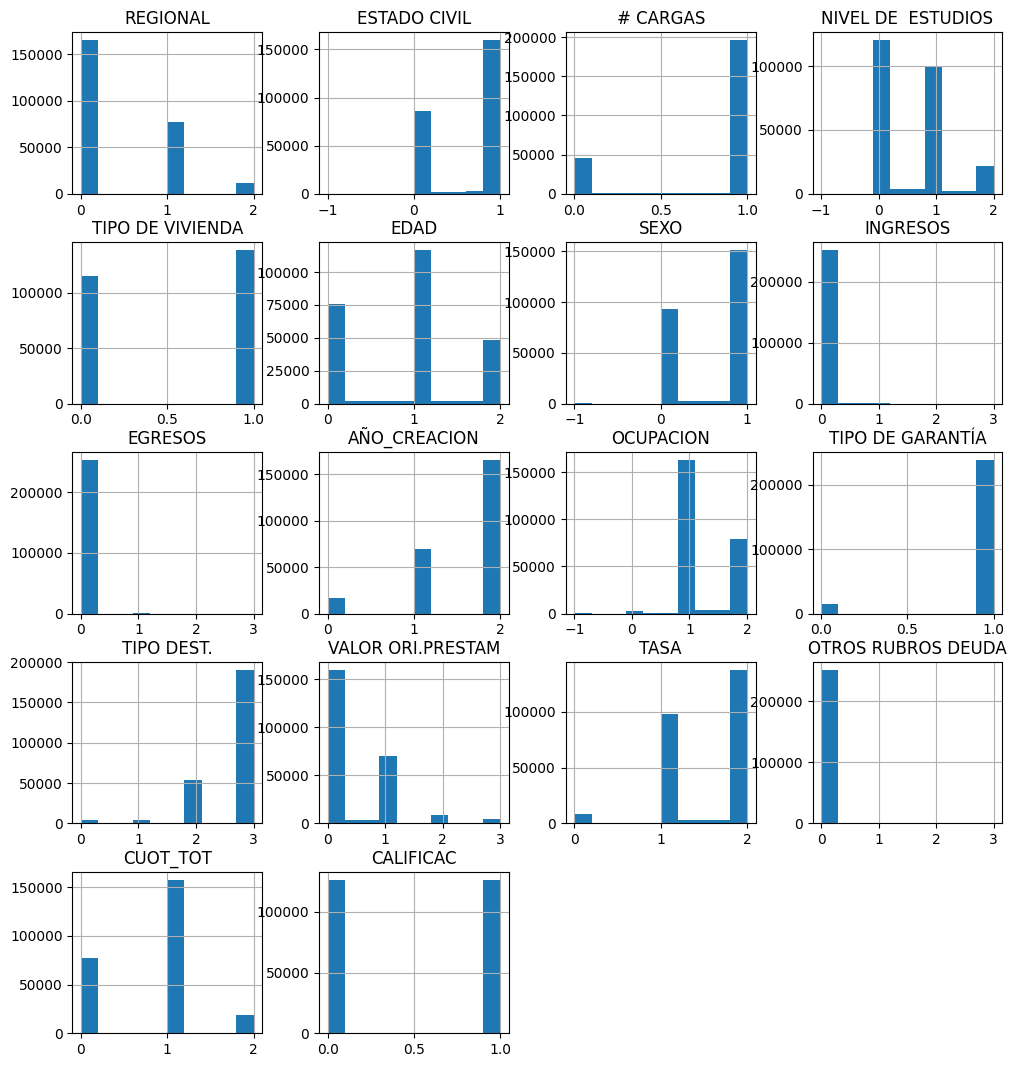

In [113]:
sm = SMOTE(random_state = 2)
x_values = encoded_dataset.iloc[:,0:17]
y_values = encoded_dataset.iloc[:,17]
x_balanced, y_balanced = sm.fit_resample(x_values, y_values)
balanced_dataset = x_balanced.copy()
balanced_dataset['CALIFICAC'] = y_balanced.copy()
balanced_dataset.info()
balanced_dataset.hist(grid=True, figsize=(12,13));

In [117]:
# Split train and test data

train,test=train_test_split(balanced_dataset, train_size=0.8, random_state = 1)
# Tomamos valores X e Y para entrenamiento
x_train = train.values[:,0:17]
y_train = train.values[:,17]
# Tomamos valores X e Y para testing
x_test = test.values[:,0:17]
y_test = test.values[:,17]

print(len(y_train))
len(y_test)

202619


50655

## ANN Modeling

In [118]:
# Create model
model = Sequential()
model.add(Dense(17, input_dim=17, activation='selu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(18,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['binary_accuracy'])

epochs = 180
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 17)                306       
                                                                 
 dense_5 (Dense)             (None, 18)                324       
                                                                 
 dense_6 (Dense)             (None, 18)                342       
                                                                 
 dense_7 (Dense)             (None, 1)                 19        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [119]:
# Train model
history = model.fit(x_train, y_train, epochs=epochs)
 
# Scores the model
scores = model.evaluate(x_train, y_train)

# Printing results
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(x_train).round())

Epoch 1/350


2023-04-09 22:28:12.555102: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6332/6332 [==============================] - 3s 453us/step - loss: 0.1254 - binary_accuracy: 0.8218
Epoch 2/350
6332/6332 [==============================] - 3s 458us/step - loss: 0.0786 - binary_accuracy: 0.8992
Epoch 3/350
6332/6332 [==============================] - 3s 463us/step - loss: 0.0648 - binary_accuracy: 0.9190
Epoch 4/350
6332/6332 [==============================] - 3s 471us/step - loss: 0.0570 - binary_accuracy: 0.9290
Epoch 5/350
6332/6332 [==============================] - 3s 474us/step - loss: 0.0521 - binary_accuracy: 0.9351
Epoch 6/350
6332/6332 [==============================] - 3s 462us/step - loss: 0.0490 - binary_accuracy: 0.9392
Epoch 7/350
6332/6332 [==============================] - 3s 473us/step - loss: 0.0468 - binary_accuracy: 0.9425
Epoch 8/350
6332/6332 [==============================] - 3s 465us/step - loss: 0.0449 - binary_accuracy: 0.9450
Epoch 9/350
6332/6332 [==============================] - 3s 463us/step - loss: 0.0433 - binary_accuracy: 0.9470
Epoc

6332/6332 [==============================] - 3s 458us/step - loss: 0.0303 - binary_accuracy: 0.9618
Epoch 74/350
6332/6332 [==============================] - 3s 474us/step - loss: 0.0303 - binary_accuracy: 0.9619
Epoch 75/350
6332/6332 [==============================] - 3s 469us/step - loss: 0.0300 - binary_accuracy: 0.9622
Epoch 76/350
6332/6332 [==============================] - 3s 459us/step - loss: 0.0302 - binary_accuracy: 0.9618
Epoch 77/350
6332/6332 [==============================] - 3s 449us/step - loss: 0.0301 - binary_accuracy: 0.9619
Epoch 78/350
6332/6332 [==============================] - 3s 452us/step - loss: 0.0301 - binary_accuracy: 0.9621
Epoch 79/350
6332/6332 [==============================] - 3s 449us/step - loss: 0.0301 - binary_accuracy: 0.9619
Epoch 80/350
6332/6332 [==============================] - 3s 458us/step - loss: 0.0299 - binary_accuracy: 0.9619
Epoch 81/350
6332/6332 [==============================] - 3s 466us/step - loss: 0.0301 - binary_accuracy: 0.9

6332/6332 [==============================] - 3s 453us/step - loss: 0.0294 - binary_accuracy: 0.9629
Epoch 146/350
6332/6332 [==============================] - 3s 458us/step - loss: 0.0292 - binary_accuracy: 0.9628
Epoch 147/350
6332/6332 [==============================] - 3s 468us/step - loss: 0.0293 - binary_accuracy: 0.9627
Epoch 148/350
6332/6332 [==============================] - 3s 464us/step - loss: 0.0293 - binary_accuracy: 0.9628
Epoch 149/350
6332/6332 [==============================] - 3s 453us/step - loss: 0.0290 - binary_accuracy: 0.9632
Epoch 150/350
6332/6332 [==============================] - 3s 493us/step - loss: 0.0291 - binary_accuracy: 0.9627
Epoch 151/350
6332/6332 [==============================] - 3s 449us/step - loss: 0.0295 - binary_accuracy: 0.9626
Epoch 152/350
6332/6332 [==============================] - 3s 452us/step - loss: 0.0291 - binary_accuracy: 0.9630
Epoch 153/350
6332/6332 [==============================] - 3s 456us/step - loss: 0.0291 - binary_accur

Epoch 217/350
6332/6332 [==============================] - 3s 449us/step - loss: 0.0287 - binary_accuracy: 0.9636
Epoch 218/350
6332/6332 [==============================] - 3s 457us/step - loss: 0.0292 - binary_accuracy: 0.9629
Epoch 219/350
6332/6332 [==============================] - 3s 451us/step - loss: 0.0291 - binary_accuracy: 0.9630
Epoch 220/350
6332/6332 [==============================] - 3s 451us/step - loss: 0.0288 - binary_accuracy: 0.9635
Epoch 221/350
6332/6332 [==============================] - 3s 451us/step - loss: 0.0287 - binary_accuracy: 0.9637
Epoch 222/350
6332/6332 [==============================] - 3s 452us/step - loss: 0.0288 - binary_accuracy: 0.9636
Epoch 223/350
6332/6332 [==============================] - 3s 449us/step - loss: 0.0289 - binary_accuracy: 0.9635
Epoch 224/350
6332/6332 [==============================] - 3s 449us/step - loss: 0.0287 - binary_accuracy: 0.9637
Epoch 225/350
6332/6332 [==============================] - 3s 451us/step - loss: 0.0290 

6332/6332 [==============================] - 3s 457us/step - loss: 0.0288 - binary_accuracy: 0.9637
Epoch 289/350
6332/6332 [==============================] - 3s 454us/step - loss: 0.0289 - binary_accuracy: 0.9634
Epoch 290/350
6332/6332 [==============================] - 3s 459us/step - loss: 0.0288 - binary_accuracy: 0.9635
Epoch 291/350
6332/6332 [==============================] - 3s 455us/step - loss: 0.0287 - binary_accuracy: 0.9637
Epoch 292/350
6332/6332 [==============================] - 3s 458us/step - loss: 0.0287 - binary_accuracy: 0.9638
Epoch 293/350
6332/6332 [==============================] - 3s 460us/step - loss: 0.0290 - binary_accuracy: 0.9635
Epoch 294/350
6332/6332 [==============================] - 3s 455us/step - loss: 0.0288 - binary_accuracy: 0.9636
Epoch 295/350
6332/6332 [==============================] - 3s 453us/step - loss: 0.0287 - binary_accuracy: 0.9635
Epoch 296/350
6332/6332 [==============================] - 3s 446us/step - loss: 0.0287 - binary_accur

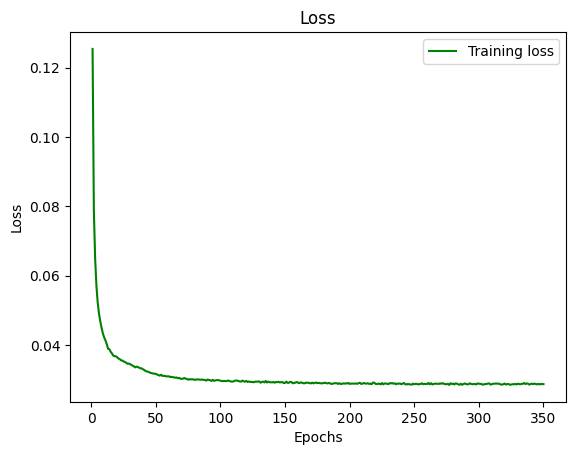

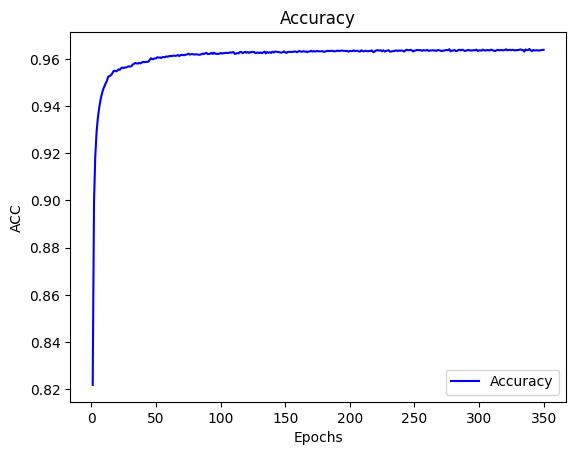

In [121]:
# Getting training metrics

# Gráfica de loss vs epochs
loss_train = history.history['loss']
acc = history.history['binary_accuracy']
epochs = range(1, epochs+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Gráfica de acc vs epochs
plt.plot(epochs, acc, 'b', label='Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

In [122]:
# Predictions and model evaluation

# test
y_pred_test = model.predict(x_test)
# redondeamos las predicciones
rounded_y_pred_test = [round(x[0]) for x in y_pred_test]

scores_test = model.evaluate(x_test,y_test)
print("Accuracy con test: \n%s: %.2f%%" % (model.metrics_names[1], scores_test[1]*100))#Accuracy (exactitud)

1583/1583 [==============================] - 0s 306us/step - loss: 0.0279 - binary_accuracy: 0.9652
Accuracy con test: 
binary_accuracy: 96.52%


In [129]:
rounded_y_pred_test

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [143]:
y_test

array([1., 1., 1., ..., 1., 0., 1.])

In [140]:
len(rounded_y_pred_test)

50655

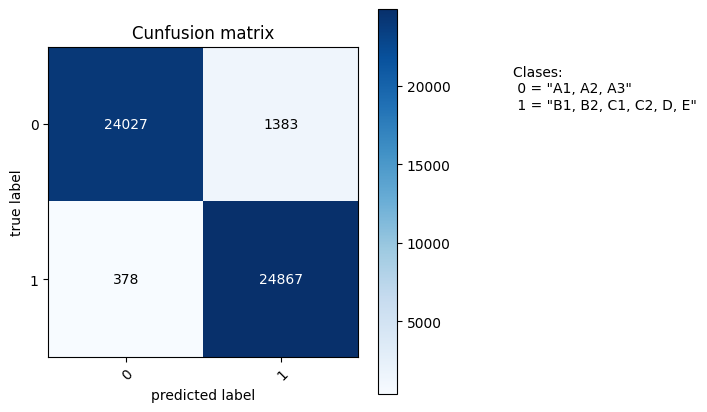

In [192]:
labels=[0, 1]
title = 'Cunfusion matrix'

confMatrix = confusion_matrix(y_test, rounded_y_pred_test, labels=labels)

fig, ax = plot_confusion_matrix(confMatrix, 
                      class_names=labels,
                      colorbar=True,
                                figsize=(5,5)
                      )
ax.annotate(f'Clases: \n 0 = "A1, A2, A3" \n 1 = "B1, B2, C1, C2, D, E"', 
            xy = (1.5, 0.8), 
            xycoords='axes fraction')

plt.title(f'{title}')
#fig.tight_layout()
plt.show()


## ANN optimization

## Results

In [123]:
# Protting ANN architecture
from ann_visualizer.visualize import ann_viz
from IPython.display import IFrame

ann_viz(model, view=True, filename='construct_model', title='ANN_Simple_Architecture')
IFrame("./construct_model.pdf", width=980, height=400)


The application cannot be opened for an unexpected reason, error=Error Domain=NSOSStatusErrorDomain Code=-10673 "(null)" UserInfo={_LSLine=3863, _LSFunction=_LSOpenStuffCallLocal}
The application cannot be opened for an unexpected reason, error=Error Domain=NSOSStatusErrorDomain Code=-10673 "(null)" UserInfo={_LSLine=3863, _LSFunction=_LSOpenStuffCallLocal}
